In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
pd.options.display.max_columns = None
pd.options.display.precision = 4
# pd.reset_option('all')
df = pd.read_csv('C:/Users/reyni/Fev23_BDS_meteo/data/weatherAUS.csv')

df.head(3)
df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

In [2]:
df.corr(method ='pearson')


# df['RainTomorrow'] = 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.0000,0.7497,0.1108,0.5068,0.0761,0.1181,0.1085,0.1373,-0.1750,0.0708,-0.4757,-0.4956,0.1062,0.0422,0.9063,0.7272
MaxTemp,0.7497,1.0000,-0.0700,0.6510,0.4639,0.0355,-0.0082,0.0123,-0.4958,-0.4481,-0.3510,-0.4517,-0.2636,-0.2578,0.8934,0.9848
Rainfall,0.1108,-0.0700,1.0000,-0.0772,-0.2464,0.1063,0.0506,0.0441,0.2636,0.2776,-0.1806,-0.1373,0.2172,0.1914,0.0137,-0.0746
Evaporation,0.5068,0.6510,-0.0772,1.0000,0.3692,0.2096,0.1932,0.1243,-0.5542,-0.4224,-0.2973,-0.3260,-0.1998,-0.2024,0.5931,0.6307
Sunshine,0.0761,0.4639,-0.2464,0.3692,1.0000,-0.0524,-0.0138,0.0292,-0.5003,-0.6293,0.0433,-0.0206,-0.6779,-0.7020,0.2890,0.4861
WindGustSpeed,0.1181,0.0355,0.1063,0.2096,-0.0524,1.0000,0.6089,0.6852,-0.1934,-0.0427,-0.4304,-0.3837,0.0881,0.1316,0.0855,-0.0004
WindSpeed9am,0.1085,-0.0082,0.0506,0.1932,-0.0138,0.6089,1.0000,0.5022,-0.2368,-0.0584,-0.2015,-0.1555,0.0349,0.0625,0.0537,-0.0184
WindSpeed3pm,0.1373,0.0123,0.0441,0.1243,0.0292,0.6852,0.5022,1.0000,-0.1006,0.0318,-0.2932,-0.2521,0.0682,0.0415,0.1140,-0.0094
Humidity9am,-0.1750,-0.4958,0.2636,-0.5542,-0.5003,-0.1934,-0.2368,-0.1006,1.0000,0.6857,0.1146,0.1730,0.4390,0.3487,-0.4236,-0.4878
Humidity3pm,0.0708,-0.4481,0.2776,-0.4224,-0.6293,-0.0427,-0.0584,0.0318,0.6857,1.0000,-0.0635,0.0241,0.5092,0.5110,-0.1516,-0.4972


In [2]:
##Correlation catégorielle chi2

table = pd.crosstab(df['RainToday'], df['RainTomorrow'] )

print('table=',table)
result_chi = chi2_contingency(table)

print('result_chi',result_chi)

statistique = result_chi[0]

p_value = result_chi[1]
degre_liberte = result_chi[2]
frequence = result_chi[3]
print('statistique =',statistique.round(4), '\np-value =', p_value, '\ndegre_liberte =',degre_liberte)

#V de Cramer
def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (((k-1)**2)/(N-1))
    r_corr = r - (((r-1)**2)/(N-1))
    return np.sqrt(phi/min(k_corr - 1, r_corr - 1))

print('V_Cramer =',V_Cramer(table, df.shape[0]).round(4))

table= RainTomorrow     No   Yes
RainToday                
No            37274  6684
Yes            6719  5743
result_chi (5388.665756166758, 0.0, 1, array([[34275.86483516,  9682.13516484],
       [ 9717.13516484,  2744.86483516]]))
statistique = 5388.6658 
p-value = 0.0 
degre_liberte = 1
V_Cramer = 0.309


In [3]:
##########Test boucle chi2
chi2_sum = []
for i in df:
    table = pd.crosstab(df[i], df['RainTomorrow'] )

#     print('table=',table)
    result_chi = chi2_contingency(table)
#     print('result_chi',result_chi)
    statistique = result_chi[0]

    p_value = result_chi[1]
    degre_liberte = result_chi[2]
    frequence = result_chi[3]

    chi2_sum.append(str(i)+' : '+' statistique = '+str(statistique.round())+ ' p-value = '+ str(p_value)+ ' degre_liberte = '+str(degre_liberte))
chi2_sum


['Date :  statistique = 6907.0 p-value = 9.734872603152863e-239 degre_liberte = 3415',
 'Location :  statistique = 1648.0 p-value = 0.0 degre_liberte = 25',
 'MinTemp :  statistique = 1278.0 p-value = 1.4147325455990991e-106 degre_liberte = 347',
 'MaxTemp :  statistique = 1918.0 p-value = 2.1948100399899187e-198 degre_liberte = 394',
 'Rainfall :  statistique = 7352.0 p-value = 0.0 degre_liberte = 409',
 'Evaporation :  statistique = 1386.0 p-value = 1.1884453416945335e-153 degre_liberte = 258',
 'Sunshine :  statistique = 12103.0 p-value = 0.0 degre_liberte = 144',
 'WindGustDir :  statistique = 746.0 p-value = 3.5949833309582217e-149 degre_liberte = 15',
 'WindGustSpeed :  statistique = 3405.0 p-value = 0.0 degre_liberte = 60',
 'WindDir9am :  statistique = 988.0 p-value = 5.2602582151639425e-201 degre_liberte = 15',
 'WindDir3pm :  statistique = 687.0 p-value = 1.1266103262933268e-136 degre_liberte = 15',
 'WindSpeed9am :  statistique = 483.0 p-value = 4.2458624748125455e-80 degre_

In [4]:
#Test ANOVA
import statsmodels.api

result = statsmodels.formula.api.ols('Temp3pm ~ RainTomorrow', data = df).fit()  
table = statsmodels.api.stats.anova_lm(result)

table

,df,sum_sq,mean_sq,F,PR(>F)
RainTomorrow,1.0,8.8875e+04,88874.7502,1967.8289,0.0
Residual,56418.0,2.5481e+06,45.1639,NaN,NaN


<AxesSubplot:>

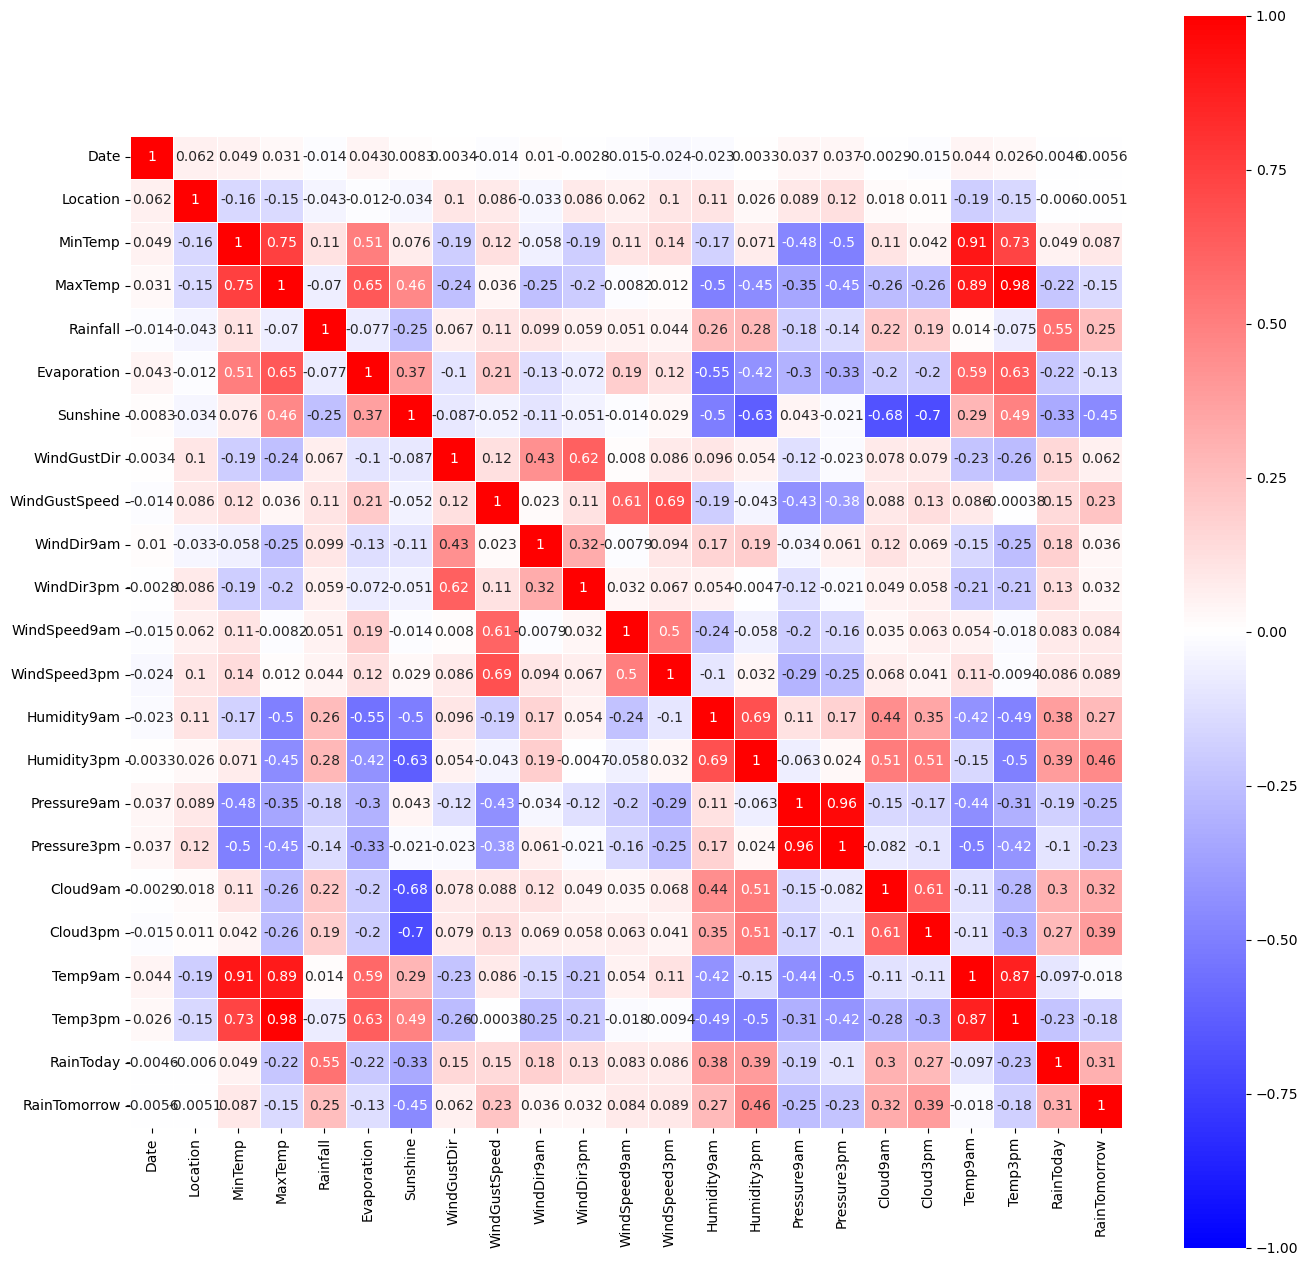

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,16))

sns.heatmap(df.assign(Location = df.Location.astype('category').cat.codes,
                      Date = df.Date.astype('category').cat.codes,
                      WindGustDir = df.WindGustDir.astype('category').cat.codes,
                      WindDir9am = df.WindDir9am.astype('category').cat.codes,
                      WindDir3pm = df.WindDir3pm.astype('category').cat.codes,
                     RainToday = df.RainToday.astype('category').cat.codes,
                     RainTomorrow = df.RainTomorrow.astype('category').cat.codes,).corr(), 
                      annot = True, cmap = 'bwr',vmin = -1, vmax = 1, square = True, linewidths = 0.5)

<AxesSubplot:title={'center':'Humidity3pm'}, xlabel='Location'>

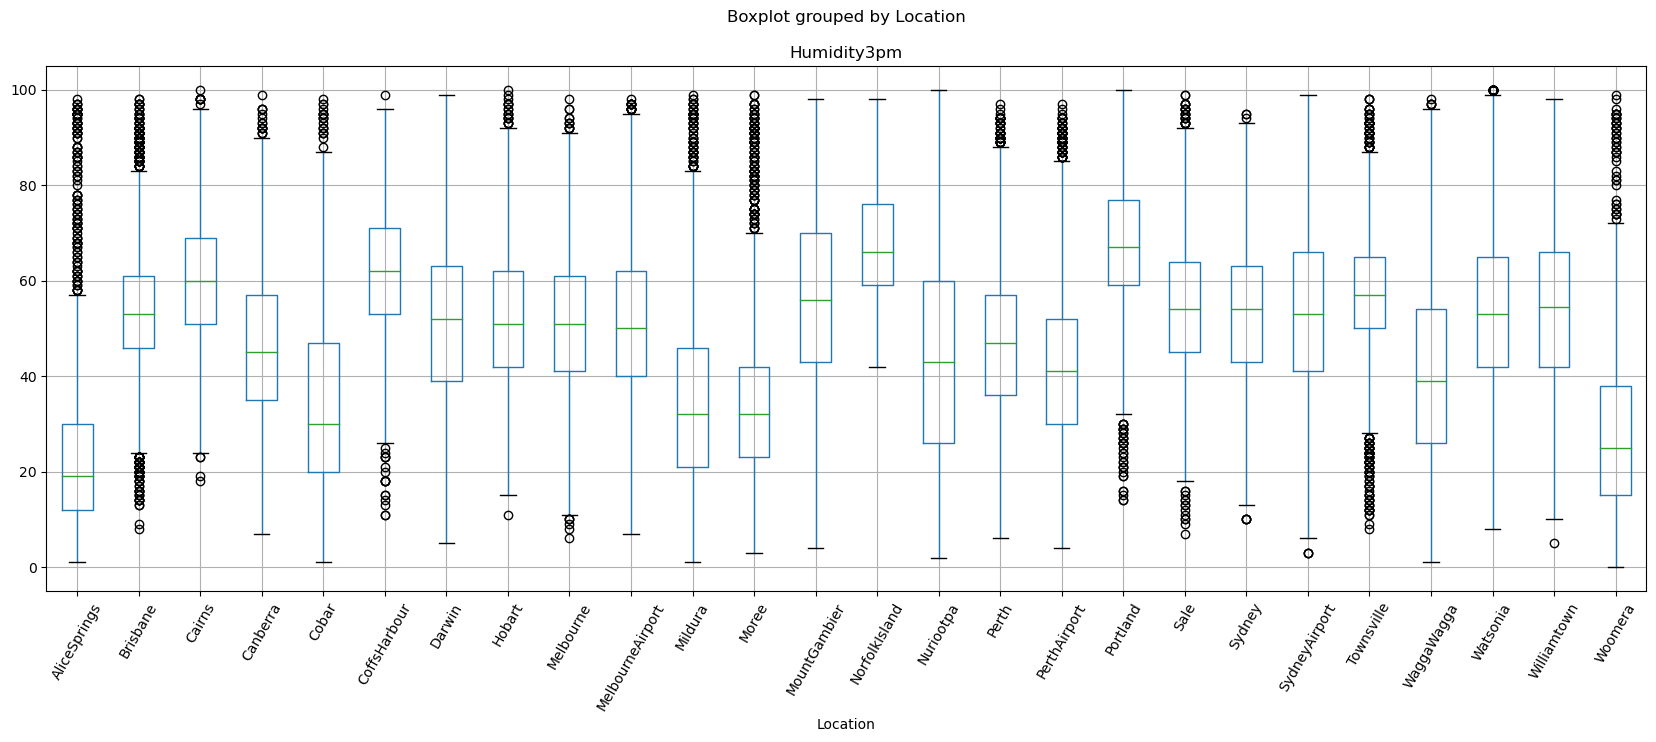

In [7]:
df.boxplot(column= 'Humidity3pm', by='Location', figsize= (20,7), rot = 60);

In [5]:
df_f = df.drop(['Temp9am', 'MinTemp','MaxTemp', 'Pressure9am'], axis= 1)
df_f = df_f.dropna()
# print(df_f)
y = df_f['RainTomorrow']
df_f = df_f.drop(['Date', 'RainTomorrow'], axis = 1)
df_f = df_f.set_index('Location')

df_f = pd.get_dummies(df_f, columns=['WindGustDir','WindDir9am', 'WindDir3pm'])

df_f = pd.get_dummies(df_f, columns=['RainToday'])
y = y.replace ('No', 0)
y = y.replace ('Yes', 1)
print(df_f)
# print(df_f.head())
# print(y)

##### Encodage Date
# df['year'] = pd.to_datetime(df['date']).dt.year
# df['month'] = pd.to_datetime(df['date']).dt.month
# df['weekday'] = pd.to_datetime(df['date']).dt.weekday
# df['hour'] = pd.to_datetime(df['date']).dt.hour
# df.head()

          Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
Location                                                                 
Cobar          0.0         12.0      12.3           48.0           6.0   
Cobar          0.0         14.8      13.0           37.0          19.0   
Cobar          0.0         10.8      10.6           46.0          30.0   
Cobar          0.0         11.4      12.2           31.0           6.0   
Cobar          0.0         11.2       8.4           35.0          17.0   
...            ...          ...       ...            ...           ...   
Darwin         0.0          6.0      11.0           35.0           9.0   
Darwin         0.0          7.6       8.6           37.0          13.0   
Darwin         0.0          5.6      11.0           33.0          17.0   
Darwin         0.0          6.2      10.6           26.0           9.0   
Darwin         0.0          5.6      10.7           30.0          15.0   

          WindSpeed3pm  Humidity9am  

In [6]:
from time import time
t0 = time()
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))
print(df_f.columns)

Réalisé en 0.0 secondes
Index(['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp3pm', 'WindGustDir_E', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
       'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
       'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE',
       'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE',
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm

La part de variance expliquée est 0.99


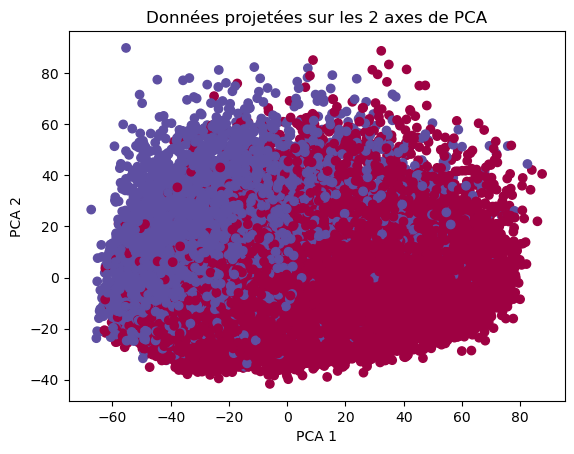

In [10]:
### Reduction de dimmension
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
df_fpca = pca.fit_transform(df_f)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df_fpca[:,0], df_fpca[:,1], c=y, cmap = plt.cm.Spectral)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')

ax.set_title("Données projetées sur les 2 axes de PCA")
plt.show

print("La part de variance expliquée est", round(pca.explained_variance_ratio_.sum(),2))

Nombre de composantes retenues : 5
[7, 3, 6, 8, 0]
0      Humidity3pm
1    WindGustSpeed
2      Humidity9am
3      Pressure3pm
4         Rainfall
Name: 1, dtype: object


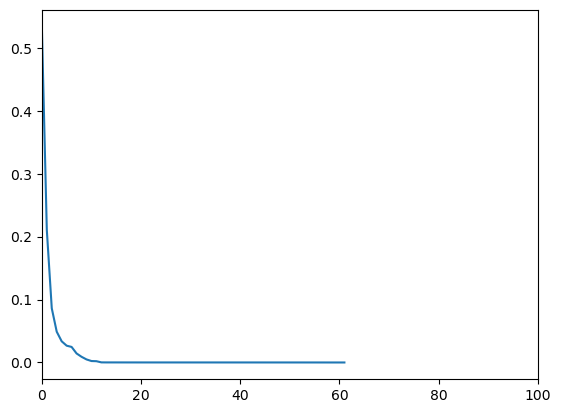

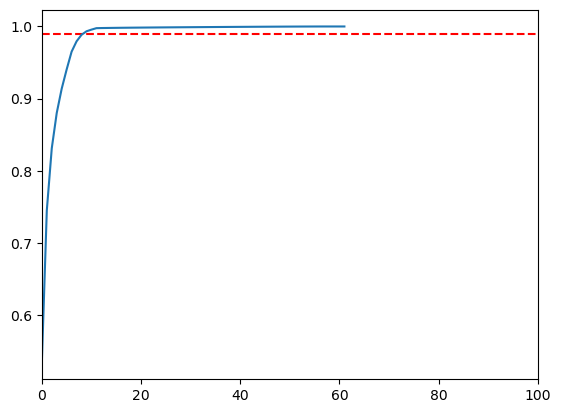

In [9]:
# Reduction de dimension suite 
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(df_f)


plt.figure()
plt.xlim(0,100)
plt.plot(pca.explained_variance_ratio_)

plt.figure()
plt.xlim(0,100)
plt.axhline(y=0.99, color = 'r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum())

pca = PCA(n_components = 0.90)
pca.fit(df_f)
print("Nombre de composantes retenues :", pca.n_components_)

### programe pour connaitre les variables les plus influentes
n_pcs= pca.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
print(most_important)
initial_feature_names = df_f.columns 
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
dfpca = pd.DataFrame(dic.items())
print(dfpca[1])
###
dfPCA = df_f[['Humidity3pm','WindGustSpeed','Humidity9am','Pressure3pm', 'Rainfall','WindSpeed9am',
            'WindSpeed3pm', 'Pressure3pm','Sunshine','Evaporation']]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfPCA, y, test_size = 0.2, random_state = 42)

In [11]:
#### Regression logisitique
from sklearn import linear_model, preprocessing

clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy :',clf.score(X_test,y_test))
print(classification_report(y_test, y_pred))

probs = clf.predict_proba(X_test)

y_preds = np.where(probs[:,1]>0.4,1,0)

ct = pd.crosstab(y_test, y_preds, rownames = ['Classe réelle'], colnames= ['Classe prédite'])
print(ct)
# i l n'y a pas d'hyperparametre pour Linear Regreesion

[[8341  458]
 [1255 1230]]
Accuracy : 0.8481921304501949
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8799
           1       0.73      0.49      0.59      2485

    accuracy                           0.85     11284
   macro avg       0.80      0.72      0.75     11284
weighted avg       0.84      0.85      0.84     11284

Classe prédite     0     1
Classe réelle             
0               8044   755
1               1018  1467


C:\Users\reyni\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# SVM
from sklearn import svm

# mise à échelle StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)
#

clf = svm.SVC(gamma=0.1,  kernel='rbf', C = 10)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

cf = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

cf

Classe prédite,0,1
Classe réelle,,
0,8439,360
1,1290,1195


In [17]:
#hyperparametre
"""
from sklearn.model_selection import GridSearchCV
parametres = {'C' : [0.1,1,10],
              'kernel' : ['rbf','linear','poly'],
              'gamma' : [0.001, 0.1, 0.5]}

grid_clf = GridSearchCV(estimator = clf, param_grid = parametres)
grille = grid_clf.fit(X_train_scaled, y_train)

print(grid_clf.best_params_)
#meilleur score = {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} temps de calcul ~30heures
y_pred = grid_clf.predict(X_test_scaled)
pd.crosstab(y_test, y_pred, rownames = ['réel'], colnames = ['predict'])
"""

"\nfrom sklearn.model_selection import GridSearchCV\nparametres = {'C' : [0.1,1,10],\n              'kernel' : ['rbf','linear','poly'],\n              'gamma' : [0.001, 0.1, 0.5]}\n\ngrid_clf = GridSearchCV(estimator = clf, param_grid = parametres)\ngrille = grid_clf.fit(X_train_scaled, y_train)\n\nprint(grid_clf.best_params_)\n#meilleur score = {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} temps de calcul ~30heures\ny_pred = grid_clf.predict(X_test_scaled)\npd.crosstab(y_test, y_pred, rownames = ['réel'], colnames = ['predict'])\n"

In [ ]:
# from sklearn.model_selection import learning_curve
# import matplotlib.pyplot as plt
# %matplotlib inline 

# train_sizes, train_scores, valid_scores = learning_curve(svm.SVC(kernel='linear', C= 1), dfPCA, y, train_sizes=[50,60], cv=5)

# plt.xlabel("Training examples")
# plt.ylabel("Score")

# train_sizes=[50,60]

# train_sizes, train_scores, test_scores = learning_curve(
#     grid_clf, dfPCA, y, n_jobs=4, train_sizes=train_sizes)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# plt.grid()

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.1,
#                  color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.1, color="g")
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#          label="Training score")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
#          label="Cross-validation score")

# plt.legend(loc="best")


In [19]:
### KNN

from imblearn.metrics import classification_report_imbalanced
from sklearn import neighbors

# score_range = []

# for k in range(2,40):
#     knn = neighbors.KNeighborsClassifier(n_neighbors = k, metric ='manhattan')
#     knn.fit(X_train, y_train)
#     score_range.append(knn.score(X_test,y_test))
    
    
# print(knn.score(X_test,y_test))

# y_pred = knn.predict(X_test)
# cm = pd.crosstab(y_test, y_pred, rownames = ['réel'], colnames = ['predict'])
# cm

# print(classification_report_imbalanced(y_test,y_pred))

score_minko = []
score_man = []
score_cheb = []

for k in range(1,40):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score_minko.append(knn.score(X_test,y_test))

for k in range(1,40):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric = 'manhattan')
    knn.fit(X_train, y_train)
    score_man.append(knn.score(X_test,y_test))
    
for k in range(1,40):
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, metric = 'chebyshev')
    knn.fit(X_train, y_train)
    score_cheb.append(knn.score(X_test,y_test))


score_minko, score_man, score_cheb

([0.7914746543778802,
  0.8245303084012762,
  0.82701169797944,
  0.8326834455866714,
  0.836848635235732,
  0.8405707196029777,
  0.8423431407302375,
  0.8420772775611485,
  0.8445586671393123,
  0.8442928039702233,
  0.8450017724211273,
  0.8432293512938674,
  0.8451790145338532,
  0.8456221198156681,
  0.8445586671393123,
  0.8458879829847572,
  0.8454448777029422,
  0.8450903934774903,
  0.8464197093229351,
  0.8463310882665721,
  0.8481921304501949,
  0.8464197093229351,
  0.8501417936901808,
  0.8493442041829139,
  0.8494328252392769,
  0.8502304147465438,
  0.8512938674228997,
  0.8498759305210918,
  0.8501417936901808,
  0.848457993619284,
  0.8502304147465438,
  0.8501417936901808,
  0.8506735200283587,
  0.8499645515774548,
  0.8505848989719957,
  0.8498759305210918,
  0.8504076568592698,
  0.8502304147465438,
  0.8494328252392769],
 [0.8009571074087203,
  0.826568592697625,
  0.8288727401630628,
  0.8373803615739099,
  0.8374689826302729,
  0.8392414037575328,
  0.8424317617

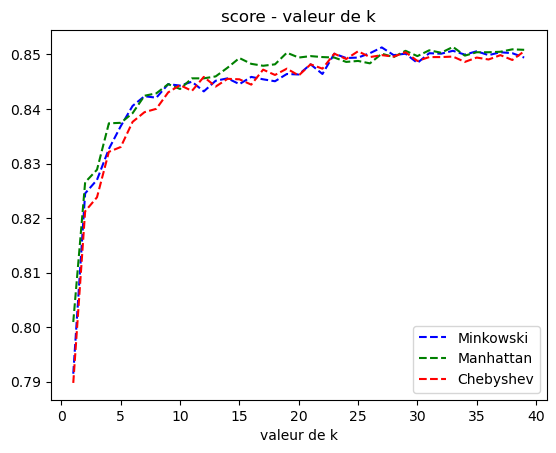

In [21]:
plt.plot(range(1,40), score_minko, color = 'blue', linestyle ='dashed', label='Minkowski')
plt.plot(range(1,40), score_man, color ='green', linestyle ='dashed', label= 'Manhattan')
plt.plot(range(1,40), score_cheb, color='red', linestyle='dashed', label='Chebyshev')
plt.legend()
plt.title('score - valeur de k')
plt.xlabel('valeur de k')
plt.ylabel=('accuracy')

In [34]:
from sklearn.model_selection import GridSearchCV

# k_range = list(range(1, 31))
# param_grid = dict(n_neighbors=k_range)

param_grid = {'n_neighbors' : list(range(1, 31)),
              'metric' : ['minkowski','manhattan','chebyshev']}
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)


print(grid_search.best_params_)

Fitting 10 folds for each of 90 candidates, totalling 900 fits
{'metric': 'minkowski', 'n_neighbors': 21}


In [12]:
#### RANDOM FOREST

clf = ensemble.RandomForestClassifier(n_jobs = -1, random_state = 321)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames = ['réel'], colnames = ['predict'])
clf.score(X_test, y_test)



NameError: name 'ensemble' is not defined

In [ ]:
# supprimer les nan
# supprimer les variables inutiles
# train_test_split
# modele de machine learning
# selection des hyperparamètres
# Evaluation de la mise à échelle
# comparer plusieurs modele avecmatrice de confusion et accuracy
# clusterisation des locations
# clusterisation des date en saison
# relancer les modèle de machine learning random forest, Gradient Boosting, Bagging
# comparer les modèle avec matice de confusion
# réduire les variables inutile via ponderation
#relancer les modème de machine learning